In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATASET = os.path.basename(os.getcwd()) # name of folder this file is in
BASE_DIR = "../../../"

RESULTS_DIR = os.path.join(BASE_DIR, "results")

In [4]:
savepath = os.path.join(RESULTS_DIR, f"results_{DATASET}.csv")
df_res = pd.read_csv(savepath)

In [5]:
hyperparams = [
    "Add_all",
    "Groups",
    "Epsilon"
]

In [6]:
df_res

,Dataset,Seed,Model_Type,Metric,Val,Hyper_Val,Test,Extra
0,adult_periodic,55,base,Accuracy,0.380368,0.380368,0.384911,"{""batch"": 0, ""train_acc"": 0.5758421738321235, ..."
1,adult_periodic,55,base,Accuracy,0.441718,0.441718,0.424060,"{""batch"": 100, ""train_acc"": 0.6045040014889261..."
2,adult_periodic,55,base,Accuracy,0.460123,0.460123,0.448070,"{""batch"": 200, ""train_acc"": 0.6407965754699423..."
3,adult_periodic,55,base,Accuracy,0.503067,0.503067,0.497891,"{""batch"": 300, ""train_acc"": 0.6695514610087474..."
4,adult_periodic,55,base,Accuracy,0.527607,0.527607,0.506949,"{""batch"": 400, ""train_acc"": 0.6943048576214406..."
5,adult_periodic,55,base,Accuracy,0.533742,0.533742,0.542127,"{""batch"": 500, ""train_acc"": 0.7124511446119486..."
6,adult_periodic,55,base,Accuracy,0.546012,0.546012,0.561546,"{""batch"": 600, ""train_acc"": 0.722966685278243,..."
7,adult_periodic,55,base,Accuracy,0.546012,0.546012,0.551992,"{""batch"": 700, ""train_acc"": 0.7265959426763446..."
8,adult_periodic,55,base,Accuracy,0.558282,0.558282,0.563283,"{""batch"": 800, ""train_acc"": 0.7341336311185558..."
9,adult_periodic,55,base,Accuracy,0.576687,0.576687,0.564524,"{""batch"": 900, ""train_acc"": 0.7360878466406104..."


In [7]:
import json
def get_batch(row):
    if 'batch' in row['Model_Type']:
        return int(row['Model_Type'][len('fweg_batch_'):])
    extra = json.loads(row.Extra)
    return extra['batch']

df_res['Batch'] = df_res.apply(get_batch, axis=1)

In [8]:
df_base = df_res[df_res['Model_Type']=='base'].copy()
df_fweg = df_res[df_res['Model_Type']=='fweg'].copy()


In [9]:
def get_hyper_train_acc(extra):
    extra = json.loads(extra)
    return extra['train_acc']

df_base['Hyper_Train'] = df_base['Extra'].apply(get_hyper_train_acc)

In [10]:
df_base.sort_values(by='Batch', ascending=True, inplace=True)
df_fweg.sort_values(by='Batch', ascending=True, inplace=True)

In [11]:
x = df_base['Batch'].values
base_ht = df_base['Hyper_Train'].values
base_test = df_base['Test'].values
fweg_test = df_fweg['Test'].values

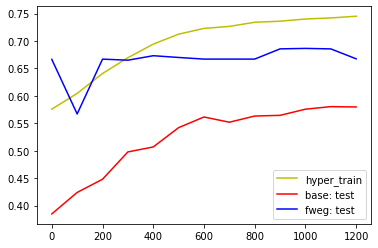

In [12]:
plt.plot(x, base_ht, color='y', label='hyper_train')
plt.plot(x, base_test, color='r', label='base: test')
plt.plot(x, fweg_test, color='b', label='fweg: test')
plt.legend()